In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("covid_19_cleaned.csv") 
# Show a quick summary for all numeric columns
# This includes count, mean, standard deviation, min, max, and quartiles
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085014e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


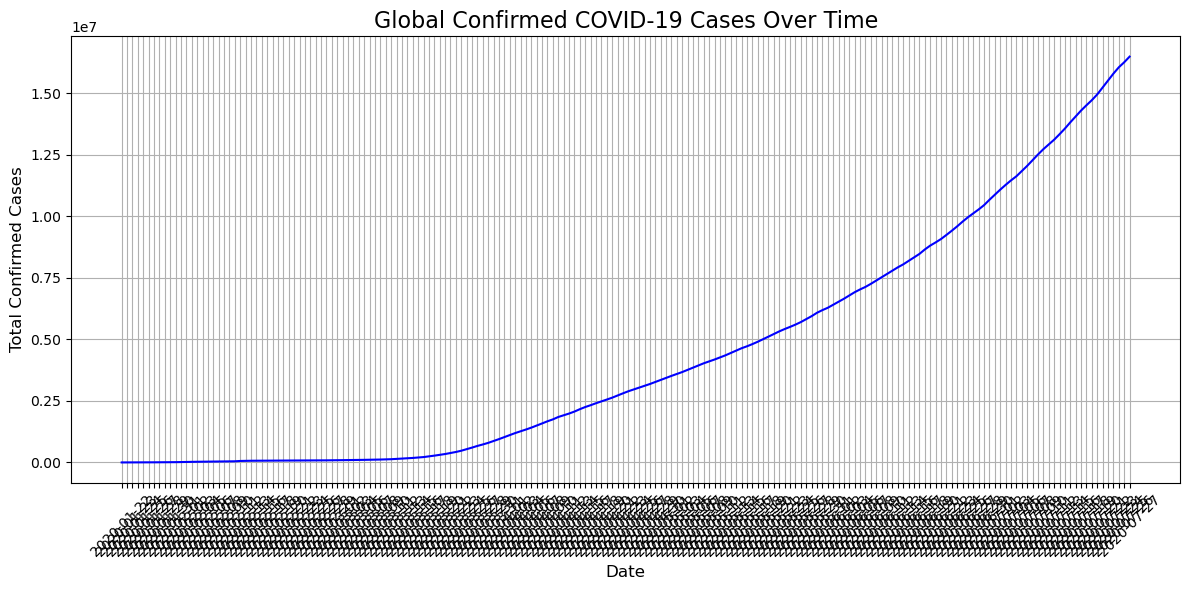

In [10]:
# Group data by date and calculate total confirmed cases for each date
# This helps us see how the total confirmed cases changed every day
global_trend = df.groupby('Date')['Confirmed'].sum()

# Create a line plot of the global confirmed case trend
plt.figure(figsize=(12, 6))  # Set the width and height of the chart
plt.plot(global_trend.index, global_trend.values, color='blue')  # Draw the line
plt.title("Global Confirmed COVID-19 Cases Over Time", fontsize=16)  # Chart title
plt.xlabel("Date", fontsize=12)  # Label for X-axis (dates)
plt.ylabel("Total Confirmed Cases", fontsize=12)  # Label for Y-axis (number of cases)
plt.grid(True)  # Show gridlines for better readability
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()  # Adjust layout so labels don’t get cut off
plt.show()


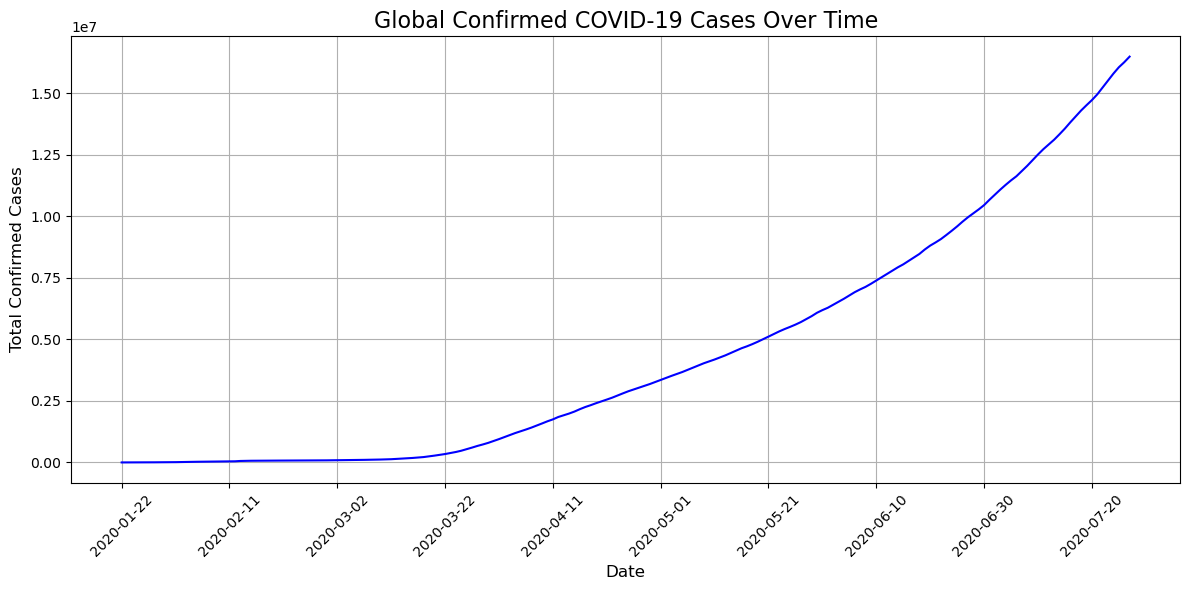

In [11]:
# Plot with fewer x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(global_trend.index, global_trend.values, color='blue')
plt.title("Global Confirmed COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Confirmed Cases", fontsize=12)
plt.grid(True)

# Fix clutter: Show every 20th date only
plt.xticks(ticks=global_trend.index[::20], rotation=45)

plt.tight_layout()
plt.show()


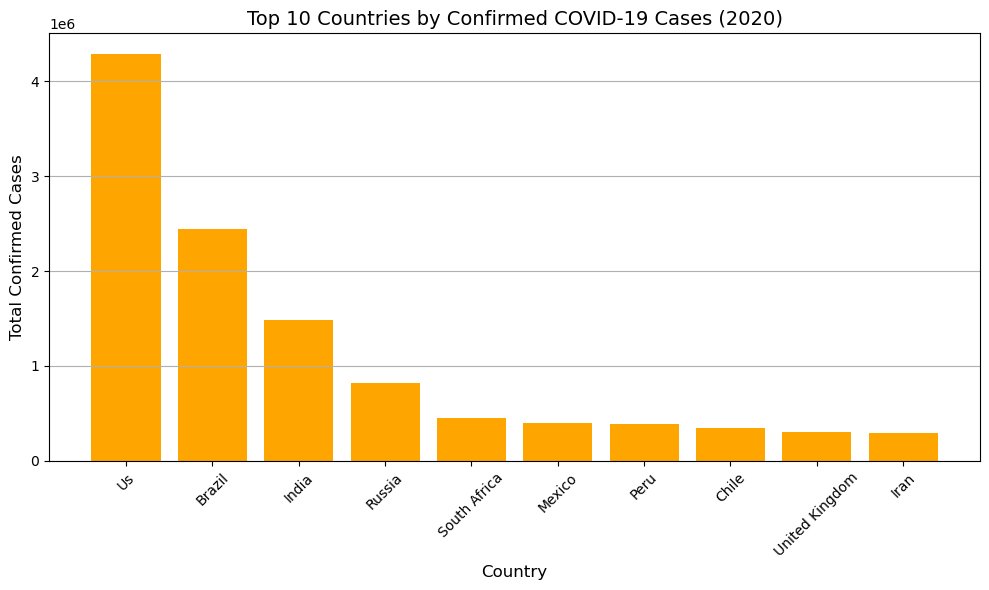

In [13]:
# Group by country and get the maximum confirmed cases for each
# We use max instead of sum to get the final count (not added daily values)
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Set size of the chart
plt.bar(top_countries.index, top_countries.values, color='orange')  # Create bar chart

# Add labels and title
plt.title("Top 10 Countries by Confirmed COVID-19 Cases (2020)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)  # Rotate country names to prevent overlap
plt.grid(axis='y')  # Show horizontal grid lines only

plt.tight_layout()  # Adjust layout so labels don’t get cut off
plt.show()


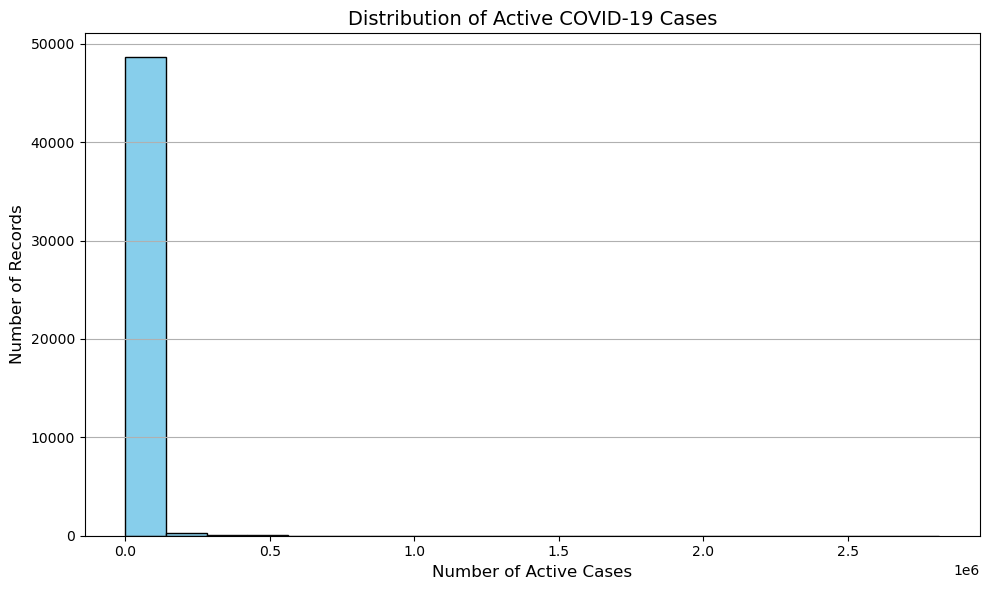

In [16]:
# Create a histogram for 'Active' cases
plt.figure(figsize=(10, 6))  # Set chart size

# Plot histogram using 50 bins (you can change number of bins to zoom in/out)
plt.hist(df['Active'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Distribution of Active COVID-19 Cases", fontsize=14)
plt.xlabel("Number of Active Cases", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.grid(axis='y')  # Show horizontal grid lines

plt.tight_layout()
plt.show()

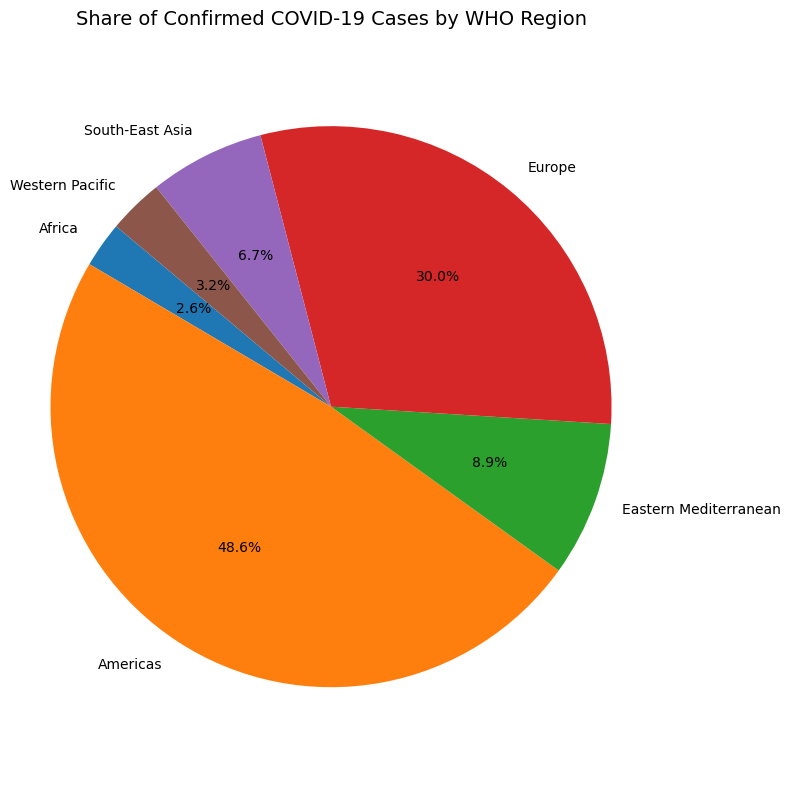

In [18]:
# Group data by WHO Region and get the total confirmed cases in each region
# This gives us how many total cases were reported in each WHO region
region_cases = df.groupby('WHO Region')['Confirmed'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the chart size
plt.pie(region_cases.values, labels=region_cases.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("Share of Confirmed COVID-19 Cases by WHO Region", fontsize=14)

# Make the pie chart look like a circle
plt.axis('equal')  

plt.tight_layout()
plt.show()

Correlation matrix:
            Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.912361   0.895506  0.950255
Deaths      0.912361  1.000000   0.763090  0.891858
Recovered   0.895506  0.763090   1.000000  0.713088
Active      0.950255  0.891858   0.713088  1.000000


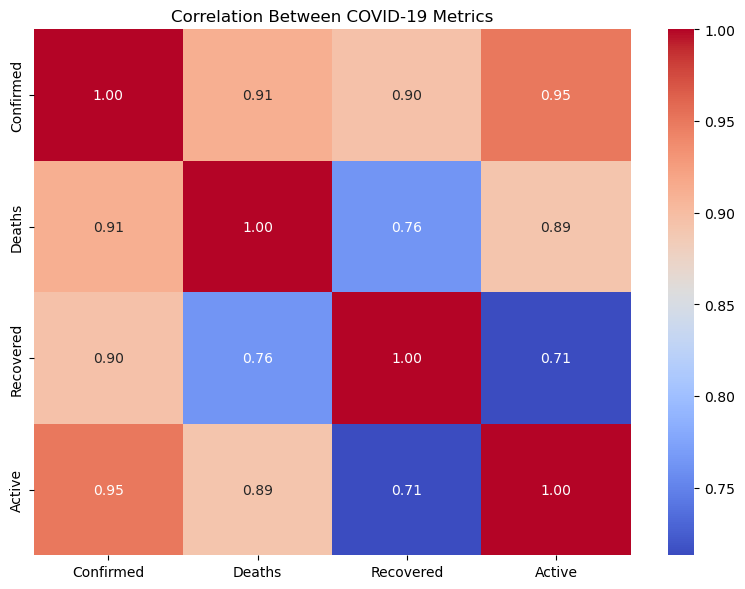

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns we want to compare
columns_to_check = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Calculate the correlation matrix
correlation_matrix = df[columns_to_check].corr()

# Show the correlation values
print("Correlation matrix:\n", correlation_matrix)

# Plot the heatmap (a colored table showing strength of relationship)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title("Correlation Between COVID-19 Metrics")

plt.tight_layout()
plt.show()